# Approach
- 基本类似77，但是本题每个元素可以取无数次，因此下一层从i开始遍历！！！

- 剪枝优化：先将candidates从小到大排序，当我们发现如果加入某一层的元素后总和已经超过target了，那么该元素后面的元素就不用考虑了！这是因为从小到大排序的，后面的元素肯定更大！如下图所示，其实是对for loop的横向遍历优化！所以如果出现超过target的情况直接break！   
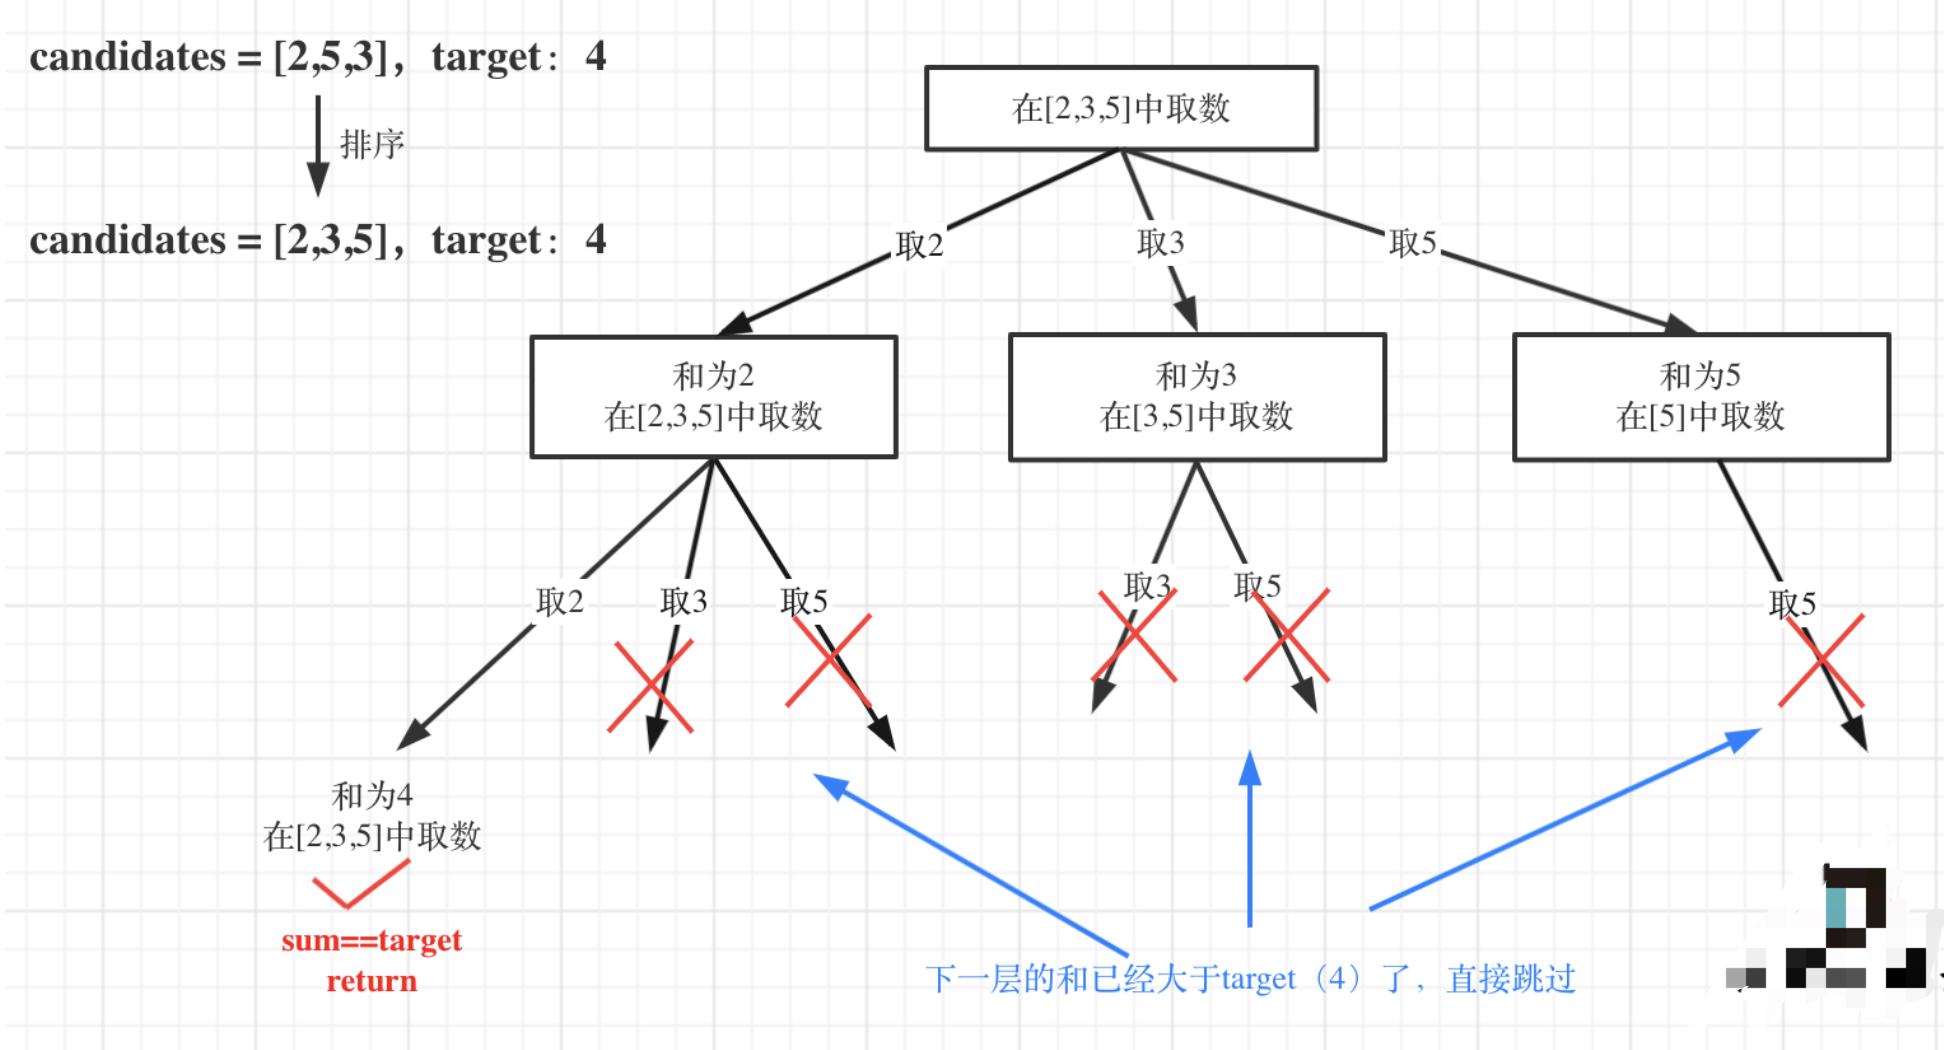

注意和没有优化的情况对比：没有优化时，遇到一个元素先加进path，然后进入下一层递归，然后检查sum是不是大于target，大于target就把该元素pop，然后继续把下一个元素加进path，重复操作，这样会检查所有的元素！但是剪枝优化时，我提前检查sum是不是大于target，如果大于，那根本就不会加进path，不会进入下一步递归，此外，由于candidates从小到大排序，所有之后的元素我都不会再考虑了！所以其实优化了两点：1.提前检查sum是不是大于target，减少递归次数 2.减少检查的元素数量！

# Code

In [ ]:
# 剪枝优化，定义sum参数累加求和
# Time: O(n * 2^n), Space: O(target)
from typing import List
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        path = []
        result = []
        # 为了剪枝
        candidates.sort()

        def backtrack(startIndex, currSum):
            if currSum == target:
                result.append(path[:])
                return
            
            for i in range(startIndex, len(candidates)):
                # 剪枝
                if currSum + candidates[i] > target:
                    break
                
                path.append(candidates[i])
                currSum += candidates[i]
                backtrack(i, currSum)
                path.pop()
                currSum -= candidates[i]
    
        backtrack(0, 0)
        return result